In [2]:
#to load Data and preprocessing
import pandas as pd 
import numpy as np 


In [3]:
#visualization package
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
#ML package
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_auc_score,roc_curve,auc,log_loss,confusion_matrix
import math 
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [69]:

#For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [70]:
df=pd.read_csv('weatherAUS.csv')

In [71]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [72]:
df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [73]:
df.shape

(142193, 24)

In [74]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [75]:
df.drop_duplicates(inplace=True)

In [76]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [77]:
df.isnull().sum()


Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

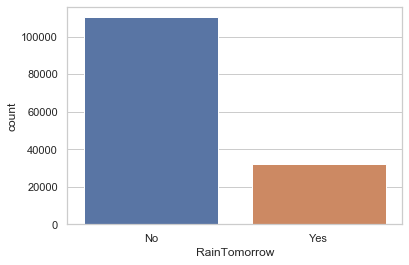

In [78]:

sns.set(style="whitegrid")

sns.countplot(df.RainTomorrow)
plt.show()

In [79]:
#Separating the data based on its class label.
data_yes = df[df['RainTomorrow']=='Yes']
data_no = df[df['RainTomorrow']=='No']

In [80]:
#Observing the mode for all columns when RainTomorrow = Yes  
mode_values_for_yes = data_yes.mode()
mode_values_for_yes



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2010-09-03,Portland,9.6,17.2,0.0,4.0,0.0,W,39.0,N,W,9.0,17.0,99.0,69.0,1014.0,1010.4,8.0,8.0,13.8,16.0,No,1.2,Yes


In [81]:
#Observing the mode for all columns when RainTomorrow = No  
mode_values_for_no = data_no.mode()
mode_values_for_no



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2014-03-18,Canberra,11.0,20.0,0.0,4.0,11.0,E,35.0,N,SE,9.0,13.0,65.0,52.0,1017.9,1015.5,1.0,1.0,16.0,20.0,No,0.0,No


In [82]:
data_no['MaxTemp'].median()

23.3

In [83]:
#replace every NaN values in tempretures with its mode value
data_yes['MinTemp'].fillna(value=data_yes['MinTemp'].mode()[0],inplace=True )
data_no['MinTemp'].fillna(value=data_no['MinTemp'].mode()[0],inplace=True )

data_yes['MaxTemp'].fillna(value=data_yes['MaxTemp'].mode()[0],inplace=True )
data_no['MaxTemp'].fillna(value=data_no['MaxTemp'].mode()[0],inplace=True )


data_yes['Temp9am'].fillna(value=data_yes['Temp9am'].mode()[0],inplace=True )
data_no['Temp9am'].fillna(value=data_no['Temp9am'].mode()[0],inplace=True )

data_yes['Temp3pm'].fillna(value=data_yes['Temp3pm'].mode()[0],inplace=True )
data_no['Temp3pm'].fillna(value=data_no['Temp3pm'].mode()[0],inplace=True )


# For humidity 
data_yes['Humidity9am'].fillna(value=data_yes['Humidity9am'].mode()[0],inplace=True )
data_no['Humidity9am'].fillna(value=data_no['Humidity9am'].mode()[0],inplace=True )



data_yes['Humidity3pm'].fillna(value=data_yes['Humidity3pm'].mode()[0],inplace=True )
data_no['Humidity3pm'].fillna(value=data_no['Humidity3pm'].mode()[0],inplace=True )


In [84]:

# For the rain fall feature we can replace NaN with zero which says there is no rain fall
data_yes['Rainfall'].fillna(value=0.0,inplace=True)
data_no['Rainfall'].fillna(value=0.0,inplace=True)

#fill pressure and wind speed with median
data_yes['Pressure9am'].fillna(value=data_yes['Pressure9am'].median(),inplace=True )
data_no['Pressure9am'].fillna(value=data_no['Pressure9am'].median(),inplace=True )

data_yes['Pressure3pm'].fillna(value=data_yes['Pressure3pm'].median(),inplace=True )
data_no['Pressure3pm'].fillna(value=data_no['Pressure3pm'].median(),inplace=True )


data_yes['WindSpeed9am'].fillna(value=data_yes['WindSpeed9am'].median(),inplace=True )
data_no['WindSpeed9am'].fillna(value=data_no['WindSpeed9am'].median(),inplace=True )

data_yes['WindSpeed3pm'].fillna(value=data_yes['WindSpeed3pm'].median(),inplace=True )
data_no['WindSpeed3pm'].fillna(value=data_no['WindSpeed3pm'].median(),inplace=True )
data_yes['WindGustSpeed'].fillna(value=data_yes['WindGustSpeed'].median(),inplace=True)
data_no['WindGustSpeed'].fillna(value=data_no['WindGustSpeed'].median(),inplace=True)

In [85]:
# For RainToday feature we cannot fill any value, so better to remove the NaN values 
data_yes.dropna(inplace=True)
data_no.dropna(inplace=True)

In [86]:
fin_data= data_yes.append(data_no, ignore_index=True)

In [87]:
fin_data.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

In [88]:
# sorting the data based on date 
fin_data=fin_data.sort_values(by='Date')

In [89]:
#Removing unwanted columns RISK_MM, data and loaction  
fin_data = fin_data.drop(['Date', 'Location','RISK_MM'], axis=1)

In [90]:
fin_data.shape

(56669, 21)

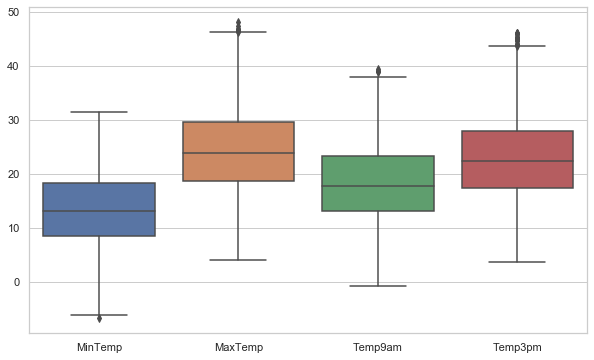

In [91]:
#Outliers we are checking only for numerical features
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=fin_data[['MinTemp','MaxTemp','Temp9am','Temp3pm']])

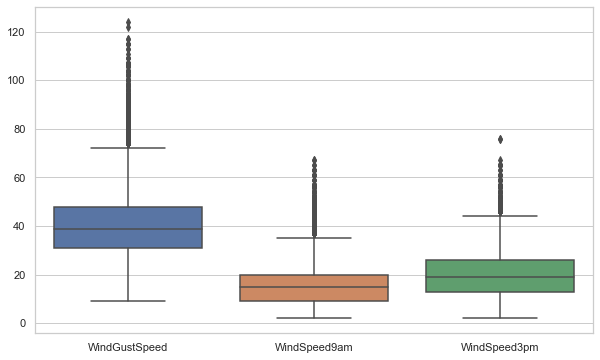

In [92]:
#from boxplot above there are no outliers
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=fin_data[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']])

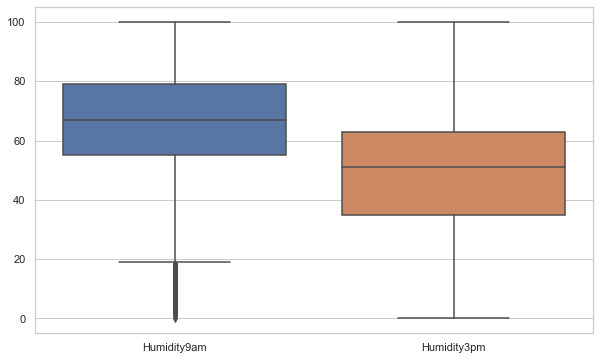

In [93]:
#All wind speed values also are in sensible ranges
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=fin_data[['Humidity9am','Humidity3pm']])


In [94]:
#as we can see that there are some humidity values =0 which is almost never possible so lets remove them
fin_data= fin_data[fin_data['Humidity3pm']!=0.0]
fin_data= fin_data[fin_data['Humidity9am']!=0.0]

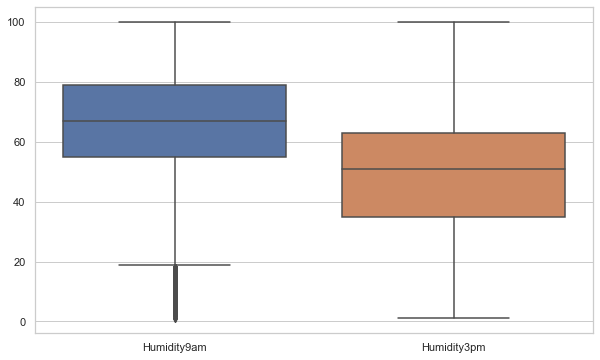

In [95]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=fin_data[['Humidity9am','Humidity3pm']])

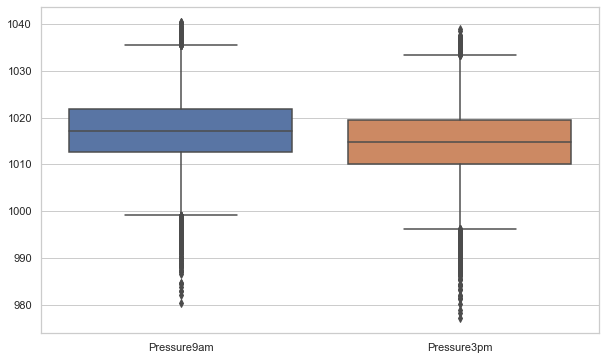

In [96]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=fin_data[['Pressure9am','Pressure3pm']])

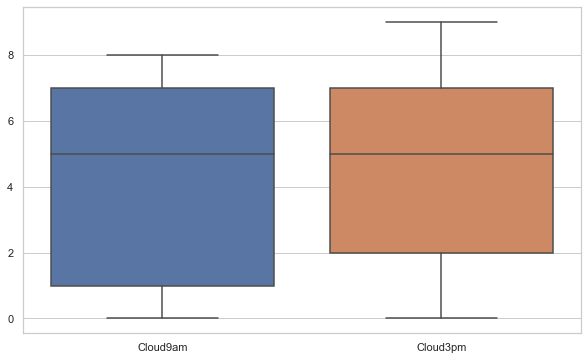

In [97]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=fin_data[['Cloud9am','Cloud3pm']])

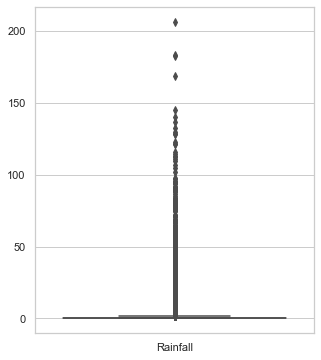

In [98]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=fin_data[['Rainfall']])

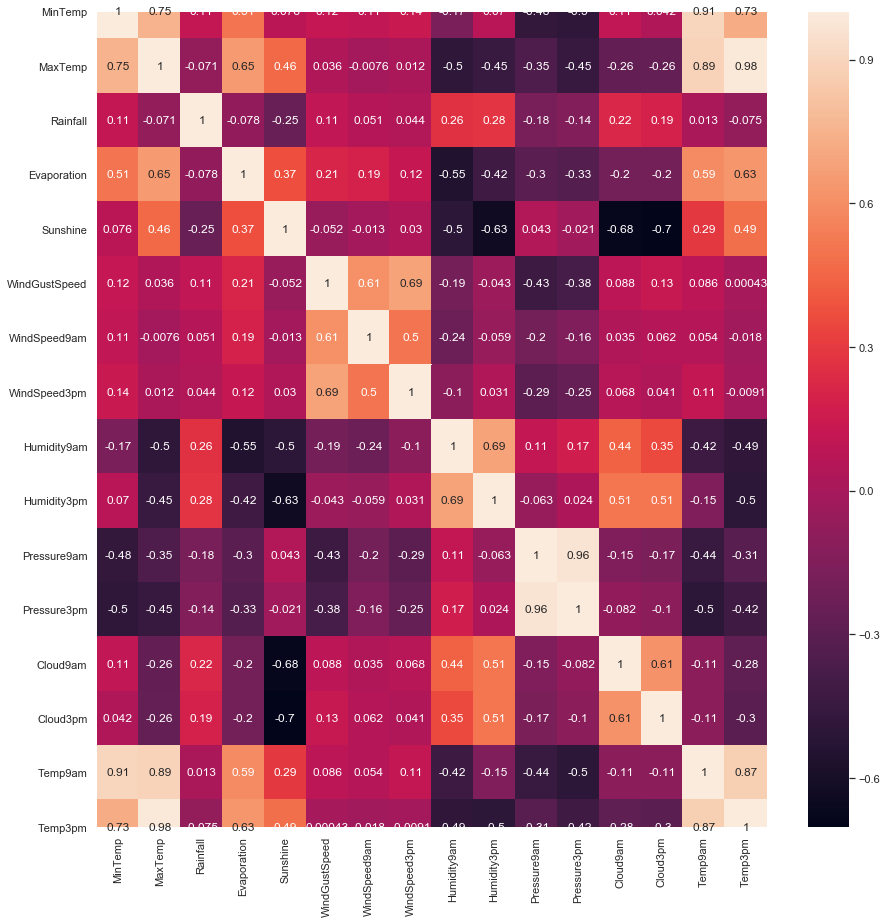

In [99]:
#correlations between attributes
fig, tam = plt.subplots(figsize=(15,15))

correlation = fin_data.corr()

sns.heatmap(
    correlation,
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values,
    ax=tam, annot=True
)

In [100]:
fin_data.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [101]:
fin_data['WindGustDir'].value_counts()

E      4528
N      4222
W      4188
SW     4071
ENE    4044
SE     3942
SSW    3918
WSW    3805
S      3659
ESE    3322
SSE    3310
NE     3196
WNW    3008
NW     2629
NNE    2526
NNW    2298
Name: WindGustDir, dtype: int64

In [102]:
#encoding all object features into values
from sklearn.preprocessing import LabelEncoder
WindGustDir_encode = LabelEncoder()
fin_data['WindGustDir']=WindGustDir_encode.fit_transform(fin_data['WindGustDir'])

WindDir9am_encode = LabelEncoder()
fin_data['WindDir9am']=WindDir9am_encode.fit_transform(fin_data['WindDir9am'])

WindDir3pm_encode = LabelEncoder()
fin_data['WindDir3pm']=WindDir3pm_encode.fit_transform(fin_data['WindDir3pm'])

RainToday_encode = LabelEncoder()
fin_data['RainToday']=RainToday_encode.fit_transform(fin_data['RainToday'])

RainTomorrow_encode = LabelEncoder()
fin_data['RainTomorrow']=RainTomorrow_encode.fit_transform(fin_data["RainTomorrow"])

In [103]:
fin_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3390,8.0,24.3,0.0,3.4,6.3,7,30.0,12,7,6.0,20.0,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,0,1
3391,14.0,26.9,3.6,4.4,9.7,1,39.0,0,13,4.0,17.0,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,1,1
3392,13.7,23.4,3.6,5.8,3.3,7,85.0,3,5,6.0,6.0,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,1,1
3393,13.3,15.5,39.8,7.2,9.1,7,54.0,14,13,30.0,24.0,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,1,1
23626,7.6,16.1,2.8,5.6,10.6,10,50.0,10,2,20.0,28.0,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50879,6.3,17.0,0.0,1.6,7.9,0,26.0,9,9,4.0,11.0,75.0,49.0,1028.6,1026.0,1.0,3.0,11.5,15.6,0,0
18595,7.6,19.3,0.0,3.4,9.4,13,35.0,13,13,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,0,0
35076,7.9,13.0,0.0,2.8,3.8,6,39.0,3,3,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,0,0
37396,11.0,24.2,0.0,2.2,9.8,1,20.0,11,5,2.0,7.0,68.0,53.0,1020.5,1017.3,6.0,3.0,15.9,22.6,0,0


In [104]:

X = fin_data[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'RainToday']]
Y = fin_data[['RainTomorrow']]

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=.2)

knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train, Y_train)

predictions = knn.predict(X_test)

error = 0
for case, prediction in zip(Y_test, predictions):
    #print(case, prediction)
    error += abs(case - prediction)

print('Error:',(error / len(predictions)))

Error: [0.26133757]


In [120]:
y_pred = knn.predict(X_test)

print(accuracy_score(Y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(Y_test, y_pred, normalize=True))

ValueError: Classification metrics can't handle a mix of binary and continuous targets